# Assignment MLP

In this exercise you will 

* implement a **multilayer perceptron** (MLP) in keras
* apply the MLP to a linear and a non-linear classification problem
* evaluate the train/validation/test accuracies
* tune hyperparameters with [keras-tuner](https://github.com/keras-team/keras-tuner)

In [ ]:
# uncomment these lines to install the required dependencies.
!pip install numpy
!pip install tensorflow-cpu
!pip install scikit-learn


     |████████████████████████████████| 144.2MB 78kB/s 


In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

In [2]:
def plot_data_and_model_predictions(X_train, y_train, X_test, y_test, model=None):
    if model:
        # Plot the decision boundary.
        h = .1 # stepsize in mesh
        offset = .1
        offset = .1
        x_min, x_max = np.vstack([X_train,X_test])[:, 0].min() - offset, np.vstack([X_train,X_test])[:, 0].max() + offset
        y_min, y_max = np.vstack([X_train,X_test])[:, 1].min() - offset, np.vstack([X_train,X_test])[:, 1].max() + offset
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)#, cmap=plt.cm.winter, alpha=.6)

    plt.plot(X_train[y_train==0,0],X_train[y_train==0,1],'r.',
         X_test[y_test==0,0],X_test[y_test==0,1],'ro',
         X_train[y_train==1,0],X_train[y_train==1,1],'b.',
         X_test[y_test==1,0],X_test[y_test==1,1],'bo')
    
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend(['Class 0 Train','Class 0 Test' ,'Class 1 Train','Class 1 Test'])
    if model:
        cbar = plt.colorbar()
        cbar.set_label('p(Class 0|x)')
    plt.axis('tight')


## Generating some linear and nonlinear toy data

We use the scikit learn utilities to generatet a linear and a nonlinear toy data set in 2D

In [10]:
n_samples = 100

X_nonlinear, y_nonlinear = make_moons(n_samples=n_samples, noise=.1)
X_linear, y_linear = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1.5)

test_size = .2
X_linear_train, X_linear_test, y_linear_train, y_linear_test = \
    train_test_split(X_linear, y_linear, test_size=test_size)

X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = \
    train_test_split(X_nonlinear, y_nonlinear, test_size=test_size)

## Plotting the linear data

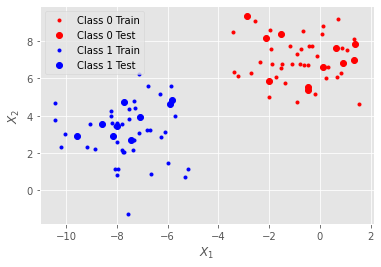

In [11]:
plot_data_and_model_predictions(X_linear_train, y_linear_train,
                                X_linear_test, y_linear_test)

## Plotting the nonlinear data

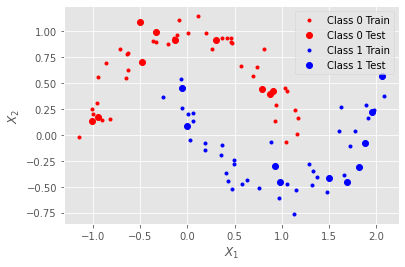

In [12]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train,
                                X_nonlinear_test, y_nonlinear_test)

## Building the models

The below two functions should return a compiled keras model that can be trained

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
def build_linear_model():
    network = models.Sequential()
    network.add(layers.Dense(2, activation='sigmoid', input_shape=(2,)))
    network.compile(optimizer=optimizers.SGD(lr=.01),
                   loss=SparseCategoricalCrossentropy(from_logits=True),
                  # List of metrics to monitor
                  metrics=['sparse_categorical_accuracy']
                   )
    return network

def build_nonlinear_model():
    network = models.Sequential()
    network.add(layers.Dense(2002, activation='relu', input_shape=(2,)))
    network.add(layers.Dense(200, activation='softmax'))


    network.compile(optimizer=optimizers.SGD(lr=.02),
                   loss=SparseCategoricalCrossentropy(from_logits=True),
                  # List of metrics to monitor
                  metrics=['sparse_categorical_accuracy']
                   )
    return network



## Training the networks on a linear problem

In [14]:
network_linear = build_linear_model()
network_linear.fit(X_linear_train, y_linear_train, batch_size=16, epochs=100, validation_split=.1, )

network_nonlinear = build_nonlinear_model()
network_nonlinear.fit(X_linear_train, y_linear_train, batch_size=16, epochs=100, validation_split=.1)

Epoch 1/100
5/5 [==============================] - 0s 46ms/step - loss: 0.5973 - sparse_categorical_accuracy: 0.6001 - val_loss: 0.3084 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.2913 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2413 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.2220 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2021 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1930 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1758 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1548 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1558 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1351 - sparse_categorical_accuracy: 

## Inspecting the linear network predictions for a linear problem

Let's plot the data on top of the prediction surface of the trained *linear* network.

As the classification problem is linear, the linear perceptron can correctly classify the data.

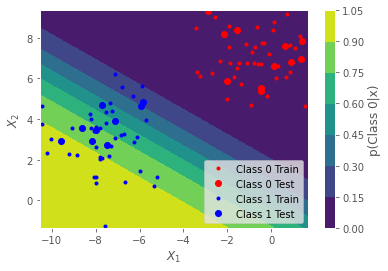

In [15]:
plot_data_and_model_predictions(X_linear_train, y_linear_train, 
                                X_linear_test, y_linear_test,
                                network_linear)

## Inspecting the nonlinear network predictions for a linear problem

Also the predictions of the *nonlinear* network classify the data correctly, at a higher computational cost due to the larger number of network parameters.

Also, the nonlinear network is more susceptible to overfitting than the linear one. Play with the size of the training set / test set and increase the noise. Check what happens to the decision boundary of the nonlinear classifier.

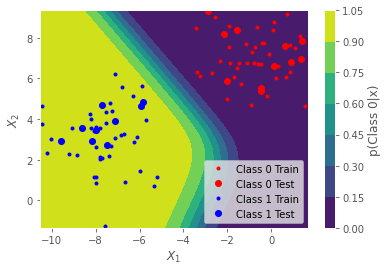

In [16]:
plot_data_and_model_predictions(X_linear_train, y_linear_train, 
                                X_linear_test, y_linear_test,
                                network_nonlinear)

## Training the networks on a nonlinear problem

In [17]:
network_linear = build_linear_model()
network_linear.fit(X_nonlinear_train, y_nonlinear_train, batch_size=64, epochs=200)

network_nonlinear = build_nonlinear_model()
network_nonlinear.fit(X_nonlinear_train, y_nonlinear_train, batch_size=64, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5279 - sparse_categorical_accuracy: 0.7125
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5060 - sparse_categorical_accuracy: 0.7333
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5048 - sparse_categorical_accuracy: 0.7385
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5171 - sparse_categorical_accuracy: 0.7229
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5285 - sparse_categorical_accuracy: 0.7177
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5118 - sparse_categorical_accuracy: 0.7146
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5223 - sparse_categorical_accuracy: 0.7042
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5122 - sparse_categorical_accuracy: 0.7146
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 0

## Inspecting the linear network predictions for a linear problem

When the classification problem is nonlinear, the *linear* network fails to find a useful decision boundary

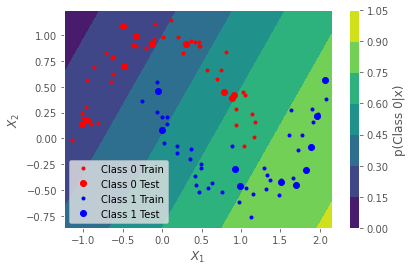

In [18]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_linear)

## Inspecting the *nonlinear* network predictions for a linear problem

The *nonlinear* network finds a better decision boundary for nonlinear data

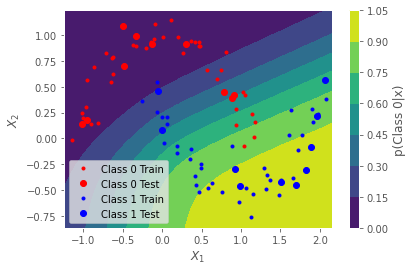

In [19]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_nonlinear)

# Extra Task: Hyperparameter Turning with ``keras-tuner``

How did you decide how many hidden units you'd need for this problem? 
How did you pick the learning rate of the optimizer or the optimizer?

Hyperparameter tuning is important for neural network training, too. 

For ``tensorflow`` there is ``kera-tuner`` that helps you with that. 

In [20]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=96cc302f6455eb07fe94ede358644fb614e735053465421b9bc47b46b5d2c808
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=7c683b2a2552e05e68662e655f8a1aa60896cd80bacd8f605c01237f02b220b1
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


## Defining a HPO-able Model

The simplest option, from the [``keras-tuner`` quickstart tutorial](https://github.com/keras-team/keras-tuner), is to just define a build model function that takes searchable hyperparameters.

The documentation is not great yet, but it's the best option for simple neural architecture and hyperparameter search.


In [21]:
from kerastuner.tuners import RandomSearch, Hyperband
from tensorflow import keras
from tensorflow.keras import layers


In [22]:
def build_model_hpo(hp):
    
    model = models.Sequential()
    # INSERT CODE HERE
    for i in range(hp.Int('layers', 2, 4)):
        model.add(layers.Dense(units=hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        #Noted that using Adam optimizer instead SGD we can get better accuracy
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model_hpo,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=5
    )

tuner.search_space_summary()

Search space summary
Default search space size: 4
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [23]:
tuner.search(X_nonlinear_train, y_nonlinear_train, validation_split=.3)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.8333333134651184

Best val_accuracy So Far: 0.8333333134651184
Total elapsed time: 00h 00m 41s
INFO:tensorflow:Oracle triggered exit


In [24]:
best_hps = tuner.get_best_hyperparameters(1)[0]
network_nonlinear_hpo = tuner.hypermodel.build(best_hps)
network_nonlinear_hpo.fit(X_nonlinear_train, y_nonlinear_train, batch_size=16, epochs=100, validation_split=.3)
network_nonlinear_hpo.summary()

Epoch 1/100
4/4 [==============================] - 1s 67ms/step - loss: 1.6867 - accuracy: 0.5932 - val_loss: 0.5625 - val_accuracy: 0.8333
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3911 - accuracy: 0.8268 - val_loss: 0.6877 - val_accuracy: 0.8333
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5843 - accuracy: 0.7964 - val_loss: 0.5520 - val_accuracy: 0.8750
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3232 - accuracy: 0.8988 - val_loss: 0.7076 - val_accuracy: 0.7917
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4021 - accuracy: 0.8577 - val_loss: 0.3851 - val_accuracy: 0.7917
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2660 - accuracy: 0.8396 - val_loss: 0.2585 - val_accuracy: 0.9167
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2644 - accuracy: 0.8854 - val_loss: 0.3259 - val_accuracy: 0.8750
Epoch 8/100
4/4 [===

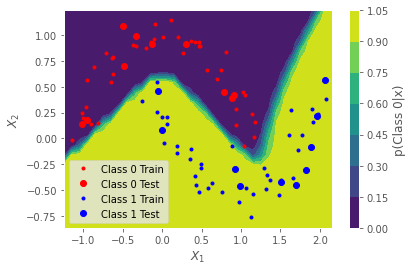

In [25]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_nonlinear_hpo)